In [64]:
import json
import tensorflow as tf

def generate_binary_labels(y_train, y_test, animal_classes):
    y_train_2 = [0 if y in animal_classes else 1 for y in y_train]
    y_test_2 = [0 if y in animal_classes else 1 for y in y_test]
    return y_train_2, y_test_2

(x_train, y_train_1), (x_test, y_test_1) = tf.keras.datasets.cifar10.load_data()

y_train_2, y_test_2 = generate_binary_labels(y_train_1, y_test_1, [2, 3, 4, 5, 6, 7])

dict_binary_label = {
    0: "animal",
    1: "vehicle"
}
dict_multiclass_label = {
    0: "airplane", 
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

Expected labels:  animal horse


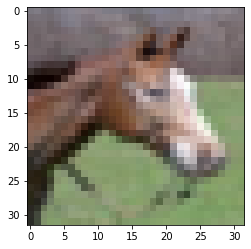

In [81]:
import requests
import numpy as np
import random
import matplotlib.pyplot as plt

random_ind = random.randrange(0, x_test.shape[0], 1)
image = x_test[random_ind,:,:,:]
plt.imshow(image)
print(
    'Expected labels: ',
    dict_binary_label[y_test_2[random_ind]],
    dict_multiclass_label[y_test_1[random_ind][0]]
)

np_image1 = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
j = {"instances": np_image1.tolist()}

In [82]:
r1 = requests.post('http://0.0.0.0:8001/invocations', json=j)
print(r1.status_code)
dict_r1 = r1.json()
print(
    "predicted labels:",
    dict_binary_label[np.argmax(dict_r1["predictions"][0])],
)

200
predicted labels: animal


In [83]:
r2 = requests.post('http://0.0.0.0:8002/invocations', json=j)
print(r2.status_code)
dict_r2 = r2.json()

print(
    "predicted labels:",
    dict_multiclass_label[np.argmax(dict_r2["predictions"][0])]
)

200
predicted labels: horse
